# Proyecto 1 Regresión 
Fernando Ariel Lozano Castillo


A continuación usaremos una base de datos del   ,[INEGI](https://www.inegi.org.mx/app/descarga/ficha.html?tit=1330093&ag=0&f=csv), 
   concretamente la **Encuesta Nacional sobre Acceso y Permanencia en la Educación (ENAPE) (datos de 2021)**, que contiene más de 32mil observaciones y 100 diferentes variables, debido a la cantidad de preguntas encuestadas.
Haremos una selección de caracteristicas, revision de problemas, regresiones lineales y no lineales así como sus respectivos R^2 y RSE

## Índice de Jupyter
<a id='indi' ></a>

[Inciso 1](#1) <br>
[Inciso 2 ](#2)<br>
[Inciso 3 ](#3) <br>
[Inciso 4 ](#4) <br>
[Inciso 5 ](#5) <br>
[Inciso 6 ](#6) <br>

# Variables 
Debido a la gran cantidad de variables que tiene la base de datos, en el repositorio dejaré al diccionario donde se explica que es cada variable y su respectivo rango,Una carpeta con los csv de las posibles respuestas a las preguntas y el csv `Encuestas`,la cual es la base de datos en si, además de los diccionarios por cada variable, por ejemplo los que digan 1,2 son referentes a si=1 y 2=no. Y habrá variables como ` ENT` que tienen mayor cantidad que es 32 que son referentes a los estados de México como se muestra en la siguiente tabla

### Entidades (Estados de México)

| Código | Entidad                          |
|--------|----------------------------------|
| 1      | Aguascalientes                   |
| 2      | Baja California                  |
| 3      | Baja California Sur              |
| 4      | Campeche                         |
| 5      | Coahuila de Zaragoza             |
| 6      | Colima                           |
| 7      | Chiapas                          |
| 8      | Chihuahua                        |
| 9      | Ciudad de México                 |
| 10     | Durango                          |
| 11     | Guanajuato                       |
| 12     | Guerrero                         |
| 13     | Hidalgo                          |
| 14     | Jalisco                          |
| 15     | Estado de México                 |
| 16     | Michoacán de Ocampo              |
| 17     | Morelos                          |
| 18     | Nayarit                          |
| 19     | Nuevo León                       |
| 20     | Oaxaca                           |
| 21     | Puebla                           |
| 22     | Querétaro                        |
| 23     | Quintana Roo                     |
| 24     | San Luis Potosí                  |
| 25     | Sinaloa                          |
| 26     | Sonora                           |
| 27     | Tabasco                          |
| 28     | Tamaulipas                       |
| 29     | Tlaxcala                         |
| 30     | Veracruz de Ignacio de la Llave  |
| 31     | Yucatán                          |
| 32     | Zacatecas                        |


<a id='1' ></a>
# 1
[Regreso al índice ](#indi) 

Primero lo que haremos es usar la librería de pandas para leer el archivo y lo almacenamos en la variable `df`, después de ello con la función `shape` veré el tamaño de la base de datos , con `value_counts` checaré cuantas muestras por estado de México en `ENT` y  con la función `dtypes`, que indica el tipo de dato que contiene cada columna de un data frame.

In [3]:
# Importa la librería pandas
import pandas as pd
df = pd.read_csv("Encuestas.csv")

print("Tamaño de la base : ",df.shape,"\n")

print("Cantidad de muestras por estado: ", df.ENT.value_counts(),"\n")

# Contar las muestras de PA3_1 respecto a cada estado
muestras_por_estado = df.groupby('ENT')['PA3_1'].value_counts().unstack(fill_value=0)
print("Cantidad de muestras de PA3_1 por estado: \n", muestras_por_estado)

Tamaño de la base :  (32343, 101) 

Cantidad de muestras por estado:  ENT
29    1859
27    1525
20    1500
21    1426
32    1277
7     1235
31    1235
15    1206
18    1189
26    1090
6     1089
12    1036
13    1010
17     993
4      970
24     965
8      939
16     922
22     902
1      872
11     845
19     819
3      809
10     807
2      797
25     794
5      781
9      771
30     720
23     713
14     639
28     608
Name: count, dtype: int64 

Cantidad de muestras de PA3_1 por estado: 
 PA3_1   1.0  2.0
ENT             
1       523  303
2       479  253
3       521  252
4       580  324
5       487  234
6       642  378
7       736  412
8       588  306
9       516  219
10      503  247
11      504  284
12      678  291
13      670  288
14      405  208
15      806  350
16      544  318
17      618  297
18      739  366
19      451  304
20      944  445
21      892  435
22      550  291
23      405  261
24      600  301
25      503  235
26      648  360
27      997  424
28      4

Con esto observamos que hay una cantidad de 32343 muestras con **101** variables cada una y que el mayor estado con muestras es el **29**, correspondiente a **Tlaxcala**.

In [6]:

# Imprime el tipo de datos de cada variable en el DataFrame de manera organizada
for column in df.columns:
    print(f'{column}: {df[column].dtype}')

FOLIO: int64
N_REN: int64
SEXO: int64
EDAD: int64
P3_1: int64
P3_2: float64
PA3_1: float64
PA3_2: float64
PA3_3_NIVEL: float64
PA3_3_BIMESTRE: float64
PA3_3_TRIMESTRE: float64
PA3_3_CUATRIMESTRE: float64
PA3_3_SEMESTRE: float64
PA3_3_ANIO: float64
PA3_3_MODMAT: float64
PA3_4: float64
PA3_5: float64
PA3_6: float64
PA3_7_1: float64
PA3_7_2: float64
PA3_7_3: float64
PA3_8_1: float64
PA3_8_2: float64
PA3_8_3: float64
PA3_8_4: float64
PA3_8_5: float64
PA3_8_6: float64
PA3_8_7: float64
PA3_8_8: float64
PB3_1: float64
PB3_2: float64
PB3_3: float64
FILTRO_A: float64
PB3_4: float64
PB3_5_NIVEL: float64
PB3_5_BIMESTRE: float64
PB3_5_TRIMESTRE: float64
PB3_5_CUATRIMESTRE: float64
PB3_5_SEMESTRE: float64
PB3_5_ANIO: float64
PB3_5_MODMAT: float64
PB3_6: float64
PB3_7: float64
PB3_8: float64
PB3_9_1: float64
PB3_9_2: float64
PB3_9_3: float64
PB3_10_1: float64
PB3_10_2: float64
PB3_10_3: float64
PB3_10_4: float64
PB3_10_5: float64
PB3_11_1: float64
PB3_11_2: float64
PB3_11_3: float64
PB3_11_4: float6

Esto nos sirvió porque podemos ver que no existen variables categóricas.
Ahora veamos solo con la primera muestra como que datos hay por cada variable para checar si hay espacios vacíos


In [9]:
print(df.head(1))

   FOLIO  N_REN  SEXO  EDAD  P3_1  P3_2  PA3_1  PA3_2  PA3_3_NIVEL  \
0      2      1     1    13     2   NaN    1.0    1.0          3.0   

   PA3_3_BIMESTRE  ...  PD3_1  PD3_2  PD3_3  ENT  NIVEL_A  GRADO_A  NIVEL_B  \
0             NaN  ...    NaN    NaN    NaN   24      3.0      6.0      3.0   

   GRADO_B  ESC  FACTOR  
0      1.0  2.0     809  

[1 rows x 101 columns]


Con esto vemos que en la sección de solución de problemas tendremos que ver como manejar esos valores en `NaN`

Ahora veamos una gráfica de barras entre *Estados* y **PA3_1** referente a una pregunta que se hizo sobre si los niños estuvieron inscritos en el periodo escolar. *2021-2022*

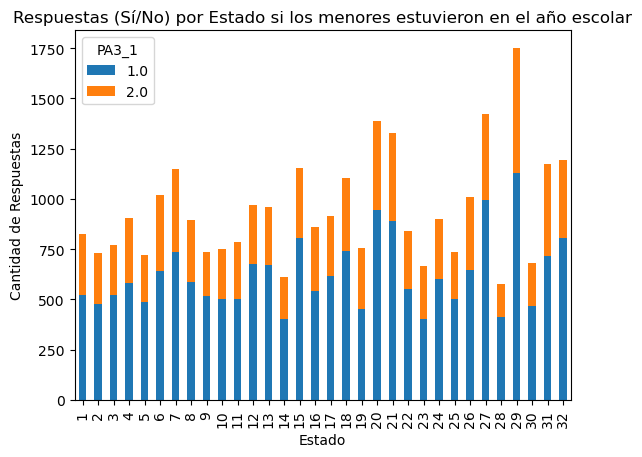

EDAD
18    1491
15    1349
12    1305
22    1304
20    1258
14    1245
10    1244
21    1238
17    1212
13    1212
19    1202
16    1182
8     1166
11    1139
6     1137
9     1129
25    1086
23    1065
7     1030
5     1016
24     998
4      985
26     919
27     898
28     860
2      848
3      811
29     807
1      665
0      542
Name: count, dtype: int64


In [13]:
import matplotlib.pyplot as plt

# Contar las ocurrencias de PA3_1 por estado
muestras_por_estado = df.groupby('ENT')['PA3_1'].value_counts().unstack(fill_value=0)

# Crear la gráfica de barras para cada estado
muestras_por_estado.plot(kind='bar', stacked=True)

# Etiquetas y título
plt.xlabel('Estado')
plt.ylabel('Cantidad de Respuestas')
plt.title('Respuestas (Sí/No) por Estado si los menores estuvieron en el año escolar')

# Mostrar la gráfica
plt.show()

print(df.EDAD.value_counts())



Con esta información creo que una opción no lineal por el momento es la opción debido a que tenemos 101 variables y la gráfica de Estado vs **PA3_1** no muestra linealidad entre ambos datos.


<a id='2' ></a>
## 2
[Regreso al índice ](#indi) 


#### Huecos
### Eliminación de variables
Eliminaré algunas variables que no tienen importancia, como número de folio `folio` y número de renglones `n_ren`, a que familiar le hicieron las preguntas sobre el menor`p3_1` aparte de factor expansión `factor`para este proyecto.


Otras variables como PA3_3_BIMESTRE, PA3_3_TRIMESTRE, PA3_3_CUATRIMESTRE, PA3_3_ANIO, PB3_5_BIMESTRE, PB3_5_TRIMESTRE, PB3_5_CUATRIMESTRE, PB3_5_ANIO, etc.: Estas columnas detallan el periodo académico (bimestre, trimestre, cuatrimestre, año) que está cursando el menor. Sin embargo, para este proyecto, solo nos interesa saber el nivel educativo que está cursando, no el periodo específico.


PA3_8_7, PA3_8_8, PA3_8_4, PB3_8_3, PB3_10_5, PB3_11_5, PB3_12_5, PC3_1, PC3_5, PC3_6, PC3_8, PD3_2, P3_2,P3_5: Estas variables representan opciones como "Ninguna de las anteriores" , detalles adicionales que no son relevantes para el análisis actual o que estaban prácticamente vacíos.

In [16]:

# Eliminar las columnas especificadas
df = df.drop([
    "FOLIO", "N_REN", "FACTOR", "P3_1",  
    "PA3_2","P3_2", "PA3_3_BIMESTRE", "PA3_3_TRIMESTRE","PA3_3_SEMESTRE", "PA3_3_CUATRIMESTRE", "PA3_3_ANIO", "PA3_3_MODMAT",
    "PA3_8_7", "PA3_8_8", "PA3_8_4","PB3_4", "PA3_5","PA3_6", "PB3_8", "PB3_5_BIMESTRE", "PB3_5_TRIMESTRE","PB3_5_SEMESTRE",
    "PB3_5_CUATRIMESTRE", "PB3_11_5", "PB3_5_ANIO", "PB3_5_MODMAT", "PB3_10_5", "PB3_11_5",
    "PB3_12_5", "PB3_13_6", "PB3_13_5", "PB3_14", "PC3_1", "PC3_5", "PC3_6", "PC3_8", "PD3_2"
], axis=1)

# Imprimir resumen del DataFrame
display(df.head())


,SEXO,EDAD,PA3_1,PA3_3_NIVEL,PA3_4,PA3_7_1,PA3_7_2,PA3_7_3,PA3_8_1,PA3_8_2,...,PC3_7,FILTRO_D,PD3_1,PD3_3,ENT,NIVEL_A,GRADO_A,NIVEL_B,GRADO_B,ESC
0,1,13,1.0,3.0,1.0,2.0,NaN,NaN,1.0,1.0,...,NaN,2.0,NaN,NaN,24,3.0,6.0,3.0,1.0,2.0
1,2,19,1.0,9.0,1.0,1.0,2.0,2.0,1.0,1.0,...,NaN,1.0,7.0,NaN,24,9.0,1.0,8.0,2.0,5.0
2,2,8,1.0,3.0,1.0,2.0,NaN,NaN,1.0,1.0,...,NaN,2.0,NaN,NaN,22,3.0,2.0,2.0,3.0,2.0
3,1,26,2.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,1.0,1.0,1.0,8.0,22,NaN,NaN,NaN,NaN,4.0
4,1,27,1.0,9.0,1.0,2.0,2.0,2.0,1.0,1.0,...,NaN,1.0,1.0,8.0,26,9.0,1.0,8.0,2.0,5.0


### Cambio en variable sexo
Ahora lo que haré es cambiar la variable de sexo a valores de 0=mujer y 1=hombre.


In [20]:
df.SEXO = df.SEXO.replace({2: 0})
print(df.SEXO.value_counts())
print(df.shape)

SEXO
1    16684
0    15659
Name: count, dtype: int64
(32343, 65)


# Rellenar con ceros
Ahora buscaré si hay variables con celdas vacías para analizar manualmente las variables y decidir que hacer y lo imprimiré.

In [23]:

# Calcular los conteos de valores no nulos
non_null_counts = df.notnull().sum()

# Verificar qué columnas tienen menos datos que el total de filas en el DataFrame
missing_data_columns = non_null_counts[non_null_counts < len(df)].index

# Verificar que las columnas existan en el DataFrame
missing_data_columns = [col for col in missing_data_columns if col in df.columns]

print("Columnas con menos datos que el total de filas:")
display(missing_data_columns)

# Reemplazar los valores nulos por 0 en esas columnas
df[missing_data_columns] = df[missing_data_columns].fillna(0)

# Verificar que los valores nulos han sido reemplazados
print("\nVerificación de valores nulos después del reemplazo:")
print(df[missing_data_columns].isnull().sum())

Columnas con menos datos que el total de filas:


['PA3_1',
 'PA3_3_NIVEL',
 'PA3_4',
 'PA3_7_1',
 'PA3_7_2',
 'PA3_7_3',
 'PA3_8_1',
 'PA3_8_2',
 'PA3_8_3',
 'PA3_8_5',
 'PA3_8_6',
 'PB3_1',
 'PB3_2',
 'PB3_3',
 'FILTRO_A',
 'PB3_5_NIVEL',
 'PB3_6',
 'PB3_7',
 'PB3_9_1',
 'PB3_9_2',
 'PB3_9_3',
 'PB3_10_1',
 'PB3_10_2',
 'PB3_10_3',
 'PB3_10_4',
 'PB3_11_1',
 'PB3_11_2',
 'PB3_11_3',
 'PB3_11_4',
 'PB3_12_1',
 'PB3_12_2',
 'PB3_12_3',
 'PB3_12_4',
 'PB3_12_6',
 'PB3_12_7',
 'PB3_12_8',
 'FILTRO_B',
 'PB3_13_1',
 'PB3_13_2',
 'PB3_13_3',
 'PB3_13_4',
 'PB3_13_7',
 'PB3_15',
 'PB3_16_1',
 'PB3_16_2',
 'PB3_16_3',
 'PB3_16_4',
 'PB3_16_5',
 'FILTRO_C',
 'PC3_2',
 'PC3_3_1',
 'PC3_3_2',
 'PC3_4',
 'PC3_7',
 'FILTRO_D',
 'PD3_1',
 'PD3_3',
 'NIVEL_A',
 'GRADO_A',
 'NIVEL_B',
 'GRADO_B',
 'ESC']


Verificación de valores nulos después del reemplazo:
PA3_1          0
PA3_3_NIVEL    0
PA3_4          0
PA3_7_1        0
PA3_7_2        0
              ..
NIVEL_A        0
GRADO_A        0
NIVEL_B        0
GRADO_B        0
ESC            0
Length: 62, dtype: int64


### Colinealidad
Por último revisare la colinealidad con un mapa de calor para checar si es necesario eliminar alguna variable extra

3 60
1.0


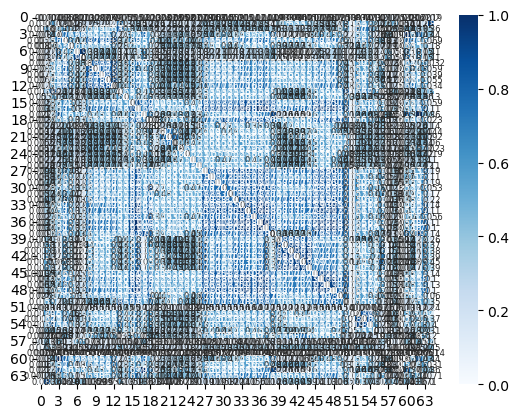

<Axes: >

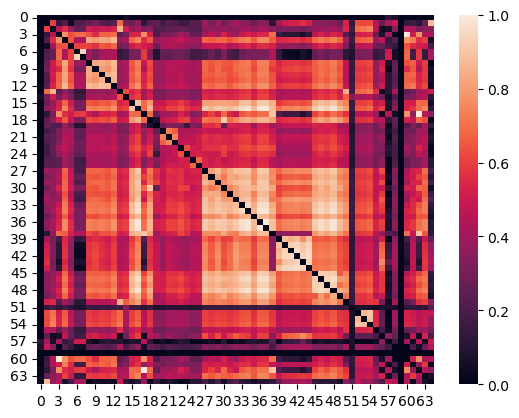

In [26]:
# Importar numpy
import numpy as np
# Obtener valor absoluto de matriz de correlación
cor = df.corr().abs().values

# Llenar la diagnoal con ceros
np.fill_diagonal(cor,0)
# Obtener los índices (i,j) de la posición del valor máximo
i,j=np.unravel_index(cor.argmax(),cor.shape)
# Imprimir los índices
print(i,j)
# Imprimir el valor de la correlación máxima
print(cor[i,j])
# Importar función heatmap de la librería seaborn
from seaborn import heatmap
import matplotlib.pyplot as plt  

heatmap(cor, annot=True, annot_kws={"size": 6}, cmap="Blues")  
plt.show()
heatmap(cor)

Ahora revisamos que variables son la 3 y 63 con


`iloc`: Es un indexador de Pandas utilizado para seleccionar datos por posición (índices). En este caso, : se utiliza para seleccionar todas las filas, y [3, 63] se usa para seleccionar las columnas en las posiciones 3 y 63.

.`columns`:Este atributo devuelve los nombres de las columnas del DataFrame seleccionado. Al utilizarlo con df.iloc[:, [3, 63]], obtenemos los nombres de las columnas en las posiciones 3 y 63.

.`tolist()`:
Este método convierte los nombres de las columnas seleccionadas en una lista de Python.

In [28]:

# Obtener los nombres de las columnas en las posiciones 3 y 63
column_names = df.iloc[:, [3, 63]].columns.tolist()

# Imprimir los nombres de las columnas
print("Nombres de las columnas 3 y 63:")
print(column_names)


Nombres de las columnas 3 y 63:
['PA3_3_NIVEL', 'GRADO_B']


Al checar que significa cada una obtenemos lo siguiente:
`PA3_3_NIVEL` es la pregunta acerca de *En qué grado (semestre, cuatrimestre o módulo) estuvo el menor de edad.*
Mientras que `GRADO_B` es sobre el nivel actual de escolaridad,entonces tienen que ver debido a que el nivel actual que tienen es debido a que ya pasaron este nivel, además de colinealidad `=1` entonces eliminaré la variable  `GRADO_B` con la función `drop`.

In [30]:
# Eliminar  variable
df = df.drop(["GRADO_B"], axis = 1)

### Variables categóricas
Aunque en un principio no se observaron

## Dummies 
Lo que optaré es checar variable por variable como están sus valores, debido a que en algunos casos 2 es referente a algún dato específico, pero en otros significa "no", entonces una vez visto que hace cada una, cambiaré los valores correspondientes de 2 y 9 a 0 y el resto se cambiara a dummies,debido a que las siguientes variables son en verdad categorícas auque tengan números.

In [33]:
for var in ["ESC","PB3_2","PB3_5_NIVEL" ,"PA3_3_NIVEL", "NIVEL_B", "GRADO_A", "NIVEL_A", "PD3_3", "PD3_1", "PC3_3_2", "PC3_3_1", "PB3_6", "PC3_2", "PB3_15"]:
    if var in df.columns:
        dummies = pd.get_dummies(df[var], drop_first=True, prefix=var)
        dummies = dummies.astype(int)  # Convertir a enteros (0 y 1)
        df = pd.concat([df, dummies], axis=1)
        df.drop(columns=[var], inplace=True)




#### Intercambio de valores
Despues aqui hago el intercambio de los terminos 2 y 9 por 0 con la función `replace`

In [35]:
# Cambiar valores específicos a 0 de las columnas que existen en el DataFrame
columns_2_to_0 = ["PA3_1", "PA3_4", "PA3_8_1", "PA3_8_2", "PA3_8_3", "PA3_8_5", "PA3_8_6", "PB3_1", "PB3_3", "PC3_4", "PB3_16_4", "FILTRO_C", "PB3_16_5", "PB3_16_2", "PB3_16_3", "PB3_16_1", "PB3_13_7", "PB3_13_4", "PB3_13_2", "PB3_13_1", "FILTRO_B", "PB3_13_3", "PB3_12_8", "PB3_12_7", "PB3_12_6", "PB3_12_4", "PB3_12_3", "PB3_12_1", "PB3_12_2", "PB3_11_4", "FILTRO_A", "PB3_5_NIVEL", "PB3_11_1", "PB3_11_2", "PB3_11_3", "PB3_11_4", "PB3_12_1", "PB3_12_2"]
columns_2_9_to_0 = ["PA3_7_1", "PA3_7_2", "PA3_7_3", "PB3_9_1", "PB3_9_2", "PB3_9_3", "PB3_10_1", "PB3_10_2", "PB3_10_3", "PB3_10_4", "PC3_7"]

for col in columns_2_to_0:
    if col in df.columns:
        df[col] = df[col].replace(2, 0)

for col in columns_2_9_to_0:
    if col in df.columns:
        df[col] = df[col].replace({2: 0, 9: 0})

# Eliminar la variable PB3_7 si existe
if "PB3_7" in df.columns:
    df.drop(columns=["PB3_7"], inplace=True)


<a id='3' ></a>
# 3
[Regreso al índice ](#indi) 


Ahora separaremos el data frame en **datos de entrenamiento** dentro de la variable `train` y **datos de prueba** en la variable `test` con una proporción de *80/20*. Es decir que ***80% para entrenar*** el modelo y el ***resto para validar los resultados*** con una partición aleatoria con el operador `sample` de pandas y el operador `drop` e `index`  para generar a `test` sin los elementos usados para el subset de entrenamiento.

In [37]:
from sklearn.model_selection import train_test_split
train, test = train_test_split(df, train_size = 0.6, random_state=30)

#Imprime las dimensiones de los datos de entrenamiento
print("Dimensiones de Train: ",train.shape)

#Imprime las dimensiones de los datos de prueba
print("Dimensiones de Test: ", test.shape)

print(" ")

Dimensiones de Train:  (19405, 179)
Dimensiones de Test:  (12938, 179)
 


**Generamos** la metodología de **selección hacia adelante** e imprime en consola los índices o  los nombres de las características seleccionadas. Para realizar este proceso, 
usaremos la función `“SequentialFeatureSelector”` de la librería 
`“mlxtend.feature_selection”`.
Aquí dejo una descripción de los 
parámetros que se usaron:<br>
- **a. estimator**: Un modelo de regresión lineal. Te recomiendo usar la función `LinearRegression` de la librería `sklearn.linear_model`.  
- **b. k_features**: Se puede seleccionar la cantidad de variables de salida que se desean, pero te recomiendo mejor usar un rango, y que el algoritmo determine el número adecuado. Por ejemplo, puedes definir el parámetro como `(2, 8)`, si te interesa que el método seleccione entre 2 y 8 variables.  
- **c. forward**: Determina si se hace selección hacia adelante (`True`) o hacia atrás (`False`); en este caso queremos hacer selección hacia adelante.  
- **d. scoring**: La métrica que se usará para determinar si un modelo es mejor que otro. Te recomiendo definirla como `'r2'` para usar la R cuadrada.  
- **e. cv**: Si se desea realizar validación cruzada, y cuántas instancias de la misma. Usare este parámetro como `10`.
- **PB3_1** es la variable que pregunta si actualmente estan escritos en el año escolar 2021-2022

In [39]:
from mlxtend.feature_selection import SequentialFeatureSelector as SFS
from sklearn.linear_model import LinearRegression
import warnings
# Suprimir la advertencia
warnings.filterwarnings("ignore", category=FutureWarning)
#Separa los datos en x y y de la serie de datos de entrenamiento
x_train = train.drop("PB3_1", axis= 1)
y_train = train["PB3_1"]


#modelo de regresion lineal
model = LinearRegression()

#caracteristicas del modelo de sequential future selector
sfs = SFS(model, k_features= (2,7), forward=True, scoring= 'r2', cv = 10 )

sfs.fit(x_train,y_train)


features = list(sfs.k_feature_names_)
print("Variables selecionadas: \n", features)


Variables selecionadas: 
 ['PA3_1', 'PB3_3', 'PB3_10_1', 'PB3_10_3', 'PB3_12_2', 'FILTRO_B', 'PB3_5_NIVEL_8.0']


Se utilizó hacia adelante debido a que es la opción más rápida que había para encontrar las variables entre la gran cantidad que tenía.

In [41]:
from sklearn.metrics import r2_score
y_test = test.PB3_1
x_test = test.drop("PB3_1", axis = 1)

x_trainF = x_train[features]
x_testF = x_test[features]

model.fit(x_trainF , y_train)

ypredict = model.predict(x_testF)

r2_forward = r2_score(y_test , ypredict)
print("R^2 =", r2_forward)

R^2 = 0.9470826709721112


Para checar si hay overfitting ahora mostrare ambos R^2, según GPT si sale Si R² en entrenamiento es mucho mayor que en prueba → Hay overfitting.

In [43]:

# Calcular R² en los datos de entrenamiento
y_train_pred = model.predict(x_trainF)
r2_train = r2_score(y_train, y_train_pred)

# Calcular R² en los datos de prueba
y_test_pred = model.predict(x_testF)
r2_test = r2_score(y_test, y_test_pred)

print(f"R² en entrenamiento: {r2_train:.6f}")
print(f"R² en prueba: {r2_test:.6f}")

R² en entrenamiento: 0.948993
R² en prueba: 0.947083


<a id='4' ></a>
# 4 Los modelos
[Regreso al índice ](#indi) 

Obtuvimos un R^2 muy similar y que se ajustan bien a los resultados, la prueba que se quedará es con train de 0.6 y features de 2 a 7, anteriormente se hizo con train de 0.8 y features de 2 a 8 y se obtuvieron casi los mismo datos.

In [45]:
import statsmodels.api as sm
## Seleccionar solo las variables elegidas por SFS
x_trainF = x_train[features]
x_testF = x_test[features]

# Agregar una constante (intercepto) al modelo
x_trainF = sm.add_constant(x_trainF)

# Ajustar el modelo con statsmodels (OLS - Mínimos Cuadrados Ordinarios)
model_sm = sm.OLS(y_train, x_trainF).fit()

# Mostrar el resumen con los p-values
print(model_sm.summary())


                            OLS Regression Results                            
Dep. Variable:                  PB3_1   R-squared:                       0.949
Model:                            OLS   Adj. R-squared:                  0.949
Method:                 Least Squares   F-statistic:                 5.156e+04
Date:                Thu, 20 Feb 2025   Prob (F-statistic):               0.00
Time:                        04:10:17   Log-Likelihood:                 15236.
No. Observations:               19405   AIC:                        -3.046e+04
Df Residuals:                   19397   BIC:                        -3.039e+04
Df Model:                           7                                         
Covariance Type:            nonrobust                                         
                      coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------
const               0.0186      0.001     

<a id='5' ></a>
# 5
[Regreso al índice ](#indi) 

In [92]:
# Estimar el valor de Y en los datos de prueba
yHat_ml = model_sm.predict(sm.add_constant(x_testF))

# Calcular RSS (Residual Sum of Squares)
RSS_ml = np.sum((y_test - yHat_ml) ** 2)

# Calcular el número de parámetros (variables predictoras + intercepto)
p = len(x_testF.columns) + 1  # +1 por la constante

# Calcular RSE (Residual Standard Error)
RSE_ml = np.sqrt(RSS_ml / (len(y_test) - p))

# Imprimir resultado formateado
print(f"Residual Standard Error (RSE): {RSE_ml:.4f}")

Residual Standard Error (RSE): 0.1122


El modelo explica el 95% de la variabilidad en la variable dependiente PB3_1 a partir de las variables independientes además de tener un RSE de 0.11.


In [51]:
# Obtener los p-values del modelo
p_values = model_sm.pvalues

# Formatear para evitar notación científica
np.set_printoptions(suppress=True)

# Mostrar los p-values con más decimales
print(p_values)

const               1.293323e-45
PA3_1              3.476314e-260
PB3_3               0.000000e+00
PB3_10_1            0.000000e+00
PB3_10_3           1.784976e-234
PB3_12_2           5.164534e-212
FILTRO_B            0.000000e+00
PB3_5_NIVEL_8.0     0.000000e+00
dtype: float64


La p value del modelo muestra que si hay variables significativas y podemos ver que de las que son más importantes son 
1. **PA3_1** que es la pregunta:estuvo inscrita(o) el pasado año o ciclo escolar (2020-2021).
   
2. **PB3_12_2**          que es la pregunta: Para la realización de sus tareas, trabajos o proyectos escolares, ¿(NOMBRE) utiliza computadora portátil (laptop o notebook)?

3. **PB3_10_3** :  Para las clases de (NOMBRE), ¿su(s) maestra(s) o maestro(s) utilizan materiales audio visuales? (videos, películas, audios)

4. **PB3_3**             La escuela donde (NOMBRE) está inscrita(o) es... si es privada o publica   
5. **PB3_10_1**    Para las clases de (NOMBRE), ¿su(s) maestra(s) o maestro(s) utilizan material escrito o impreso? (libros de texto, enciclopedias, revistas, fotocopias)

6. **PB3_5_NIVEL_8.0**  Nivel de estudios actuales 
01	Preescolar
02	Primaria
03	Secundaria
04	Profesional técnico (carrera técnica con secundaria terminada)
05	Preparatoria o bachillerato general
06	Bachillerato tecnológico
07	Técnico Superior Universitario (carrera técnica con bachillerato terminado)
08	Licenciatura o profesional
09	Especialidad
10	Maestría
11	Doctorado


7. **FILTRO_B 1**	Si la persona tiene 3 a 17 años, continúe
	De lo contrario, pase a B3.16
Pregunta PB3.16.1 ¿Las actuales condiciones educativas hacen que (NOMBRE) se sienta tensionada(o) o estresada(o)?

# No lineal
Ahora procedemos con un modelo no lineal en este caso iba a hacer un polinomial pero no logra el kernel dejar de trabajar entonces solo uso el principio de la polinomial y haré un knn debido a que este fue el más rápido de procesarse.


In [96]:
from sklearn.preprocessing import PolynomialFeatures
# No cambiar la forma de los datos, mantener las múltiples características
Xtemp_train = x_train
Xtemp_test = x_test

# Generar polinomiales de grado 2 y ajustar los datos respecto a las variables
polyq_train = PolynomialFeatures(degree=2)
polyq_test = PolynomialFeatures(degree=2)

# Transformar los datos para que incluyan el polinomio de segundo orden
Xq_train = pd.DataFrame(polyq_train.fit_transform(Xtemp_train), columns=polyq_train.get_feature_names_out(x_train.columns))
Xq_test = pd.DataFrame(polyq_test.fit_transform(Xtemp_test), columns=polyq_test.get_feature_names_out(x_test.columns))

# Verificar las dimensiones después de la transformación
print("Dimensiones de Xq_train:", Xq_train.shape)
print("Dimensiones de Xq_test:", Xq_test.shape)

# Asegurarse de que y_train y Xq_train tengan las mismas filas
y_train = y_train.reset_index(drop=True)
Xq_train = Xq_train.reset_index(drop=True)


Dimensiones de Xq_train: (19405, 16110)
Dimensiones de Xq_test: (12938, 16110)


Dicho modelo no asume ningún tipo de relación entre la variable de entrada y la de salida. Usaremos la función `KNeighbotsRegressor` de sklearn.neighbors para generar el modelo, y la función `fit` para entrenarlo. Probaremos en este caso con diferente cantidad de vecinos.

In [110]:
# Importar librerías
from sklearn.neighbors import KNeighborsRegressor as KNN


# Definir los valores de k a probar
k_values = [1, 5, 10, 15, 20,50,60,80,100,500]
models = {}

# Entrenar modelos con diferentes valores de k
# Recoger las métricas para cada valor de k
for k in k_values:
    # Entrenar el modelo KNN
    models[k] = KNN(n_neighbors=k).fit(Xtemp_train, y_train)
    
    # Hacer predicciones para los datos de prueba
    yHat_mk_test = models[k].predict(Xtemp_test)
    
    # Hacer predicciones para los datos de entrenamiento
    yHat_mk_train = models[k].predict(Xtemp_train)
    
    # Calcular R² para los datos de prueba
    r2_test = r2_score(y_test, yHat_mk_test)
    
    # Calcular R² para los datos de entrenamiento
    r2_train = r2_score(y_train, yHat_mk_train)
    
    # Calcular RSS y RSE (como ya lo tenías)
    RSS_mk = sum((y_test - yHat_mk_test) ** 2)
    RSE_mk = np.sqrt(RSS_mk / (len(y_test) - 1))

    # Imprimir resultados
    print(f"Resultados para k={k}:")
    print(f"  R² en datos de prueba: {r2_test}")
    print(f"  R² en datos de entrenamiento: {r2_train}")
    print(f"  RSE: {RSE_mk}")


Resultados para k=1:
  R² en datos de prueba: 0.993502252666246
  R² en datos de entrenamiento: 1.0
  RSE: 0.039318614761975644
Resultados para k=5:
  R² en datos de prueba: 0.9919817797901476
  R² en datos de entrenamiento: 0.9951731887540862
  RSE: 0.04367730048929308
Resultados para k=10:
  R² en datos de prueba: 0.9891097754686283
  R² en datos de entrenamiento: 0.991766789762113
  RSE: 0.050902043282739534
Resultados para k=15:
  R² en datos de prueba: 0.9860601660533198
  R² en datos de entrenamiento: 0.988763344601045
  RSE: 0.05758980382072559
Resultados para k=20:
  R² en datos de prueba: 0.9832211919474138
  R² en datos de entrenamiento: 0.9861358697554197
  RSE: 0.06318257940006863
Resultados para k=50:
  R² en datos de prueba: 0.9688546076150103
  R² en datos de entrenamiento: 0.9727870598957341
  RSE: 0.08608226829188971
Resultados para k=60:
  R² en datos de prueba: 0.9649871592315389
  R² en datos de entrenamiento: 0.9692696135438607
  RSE: 0.09127050915343639
Resultados

Nos quedaremos con k=100 por su bajo RSE,indica que las predicciones del modelo están más cerca de los valores reales, sugiriendo un buen ajuste. además de que mientras más K , el error va aumentando.

In [115]:
mk = KNN(n_neighbors=100).fit(Xtemp_train,y_train)
yHat_mk = mk.predict(Xtemp_test)
RSS_mk = sum((list(y_test)-yHat_mk)**2)
RSE_mk = np.sqrt(RSS_mk/(len(y_test)-1))
print(RSE_mk)

0.10638199642990495


<a id='6' ></a>
# 6 Inferencia
[Regreso al índice ](#indi) 

Ahora usando el modelo lineal que hicimos hare la inferencia del modelo

In [127]:
print(model_sm.summary())

                            OLS Regression Results                            
Dep. Variable:                  PB3_1   R-squared:                       0.949
Model:                            OLS   Adj. R-squared:                  0.949
Method:                 Least Squares   F-statistic:                 5.156e+04
Date:                Thu, 20 Feb 2025   Prob (F-statistic):               0.00
Time:                        04:39:40   Log-Likelihood:                 15236.
No. Observations:               19405   AIC:                        -3.046e+04
Df Residuals:                   19397   BIC:                        -3.039e+04
Df Model:                           7                                         
Covariance Type:            nonrobust                                         
                      coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------
const               0.0186      0.001     

Inferencias que puedes realizar:
Relación de las variables con PB3_1:

**PA3_1, PB3_3, PB3_10_1, PB3_10_3, PB3_12_2, FILTRO_B, y PB3_5_NIVEL_8.0** todas tienen un efecto positivo significativo sobre PB3_1. Es decir, un aumento en cualquiera de estas variables se espera que aumente PB3_1.
Las variables más influyentes en la predicción de PB3_1 parecen ser FILTRO_B y PB3_5_NIVEL_8.0, con coeficientes de 0.4510 y 0.4577 respectivamente, lo que sugiere que tienen un impacto mayor en comparación con las otras variables.
Intervalos de confianza:

El R-squared cercano a 1 y los valores p pequeños en todas las variables nos permiten concluir que el modelo de regresión es muy efectivo para predecir PB3_1 y que las relaciones entre las variables son estadísticamente significativas.

Posibles errores :Aunque el modelo es significativo, el modelo OLS podría estar sobreajustado o no incluir todas las variables importantes

Ciertas partes del codigo fueron realizadas con la ayuda de inteligencias artificiales, como deep seek,copilot y gpt.


Firma de honor: Doy mi palabra que he realizado esa actividad con integrida académica